In [4]:
import fprlib as fp
from uncertainties import ufloat
import numpy as np

In [6]:
input_mase_z_napakami = [
    ufloat(10, 1),
    ufloat(20, 1),
    ufloat(20, 1),
    ufloat(50, 1),
    ufloat(100, 1),
    ufloat(200, 2),
    ufloat(200, 2),
    ufloat(500, 2)
]
mer_obremenitev_z_napakami = []
sum = 0
for i in input_mase_z_napakami[:]:
    sum += ufloat(i.n, i.s)*10**-3
    mer_obremenitev_z_napakami.append(sum)
mer_obremenitev_z_napakami.append(mer_obremenitev_z_napakami[-1])
for i in mer_obremenitev_z_napakami[-3::-1]:
    mer_obremenitev_z_napakami.append(i)

# print(len(mer_obremenitev_z_napakami))
# print(mer_obremenitev_z_napakami)

input_deform_kv_prof = [
#    ufloat(5.92, 0.02),
    ufloat(5.90, 0.02),
    ufloat(5.86, 0.02),
    ufloat(5.83, 0.02),
    ufloat(5.75, 0.02),
    ufloat(5.58, 0.02),
    ufloat(5.24, 0.02),
    ufloat(4.89, 0.02),
    ufloat(4.03, 0.02),
    ufloat(4.05, 0.02),
    ufloat(4.90, 0.02),
    ufloat(5.25, 0.02),
    ufloat(5.58, 0.02),
    ufloat(5.75, 0.02),
    ufloat(5.83, 0.02),
    ufloat(5.86, 0.02),
    ufloat(5.90, 0.02),
#    ufloat(5.92, 0.02),
]

kv_profil_odmik = []
for i in range(len(input_deform_kv_prof)):
    kv_profil_odmik.append((ufloat(5.92, 0.02) - input_deform_kv_prof[i]) * 10**(-3))
#print(kv_profil_odmik)

input_deform_va_prof = [
#    ufloat(6.02, 0.02),
    ufloat(6.01, 0.02),
    ufloat(5.94, 0.02),
    ufloat(5.89, 0.02),
    ufloat(5.74, 0.02),
    ufloat(5.46, 0.02),
    ufloat(4.89, 0.02),
    ufloat(4.33, 0.02),
    ufloat(2.90, 0.02),
    ufloat(2.89, 0.02),
    ufloat(4.31, 0.02),
    ufloat(4.87, 0.02),
    ufloat(5.45, 0.02),
    ufloat(5.72, 0.02),
    ufloat(5.87, 0.02),
    ufloat(5.94, 0.02),
    ufloat(5.98, 0.02),
#    ufloat(6.015, 0.02),
]

va_profil_odmik = []
for i in range(len(input_deform_va_prof)):
    va_profil_odmik.append((ufloat(6.02, 0.02) - input_deform_kv_prof[i]) * 10**(-3))
#print(va_profil_odmik)

# print(len(input_deform_xx_prof))

koficient_vzmeti_ure = ufloat(41, 9.904)

# Vztrajnostni moment (kv profila) palice

J_kv = ufloat(0.0069, 0.0001)**4 / 12
print("Vzst. Mom. KV. profila: ")
print(J_kv)

J_va = np.pi*ufloat(0.00345, 0.0001)**4 / 4
print("Vzst. Mom. VA. profila: ")
print(J_va)

Vzst. Mom. KV. profila: 
(1.89+/-0.11)e-10
Vzst. Mom. VA. profila: 
(1.11+/-0.13)e-10


In [8]:
# za KV profil
lista_jungovih_modulov = []
'''for i in range(20):
    var = {
        "u" : ufloat(kv_profil_odmik[i].n, kv_profil_odmik[i].s, "u"),
        "m" : ufloat(mer_obremenitev_z_napakami[i].n, mer_obremenitev_z_napakami[i].s, "D"),
        "J_kv" : ufloat(J_kv.n, J_kv.s, "J_kv")
    }
    
    def f():
        return (ufloat(0.56,0.002)**3 * (9.81*var["m"] - var["u"] * ufloat(41, 9.904)))/(48*var["u"]*var["J_kv"])
    
    fp.ErrorCalc(f, var)
'''

'for i in range(20):\n    var = {\n        "u" : ufloat(kv_profil_odmik[i].n, kv_profil_odmik[i].s, "u"),\n        "m" : ufloat(mer_obremenitev_z_napakami[i].n, mer_obremenitev_z_napakami[i].s, "D"),\n        "J_kv" : ufloat(J_kv.n, J_kv.s, "J_kv")\n    }\n    \n    def f():\n        return (ufloat(0.56,0.002)**3 * (9.81*var["m"] - var["u"] * ufloat(41, 9.904)))/(48*var["u"]*var["J_kv"])\n    \n    fp.ErrorCalc(f, var)\n'


-| Fit values |----------------------------------------

fit_E_kv : 112040341032.55211

-| Parameter standard deviation values |---------------

fit_E_kv stdev (1 sigma) : 227734625.9933272

-| Graph |---------------------------------------------



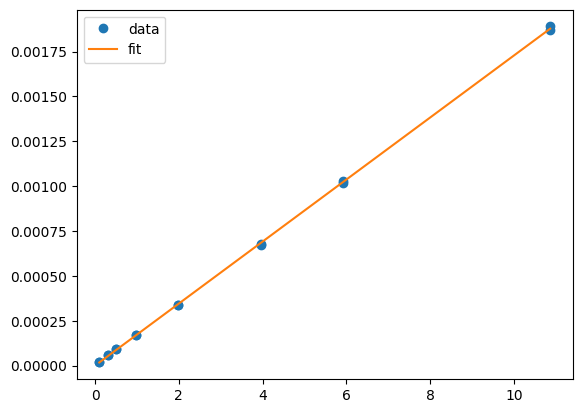

In [10]:
F = []
u = []
m = []

for i in kv_profil_odmik:
    u.append(i.n)
for i in mer_obremenitev_z_napakami:
    m.append(i.n)

for i in range(len(u)):
    F.append( 9.81 * m[i] + 41 * u[i] )

sez = ["E_kv"]
p = [1]

def funkcija(x,E):
    return x*0.56**3/(48*E*1.89*10**-10)

fp.cfit(funkcija, F, u,sez, p)


-| Fit values |----------------------------------------

fit_E_va : 176440198504.8972

-| Parameter standard deviation values |---------------

fit_E_va stdev (1 sigma) : 3993195621.038438

-| Graph |---------------------------------------------



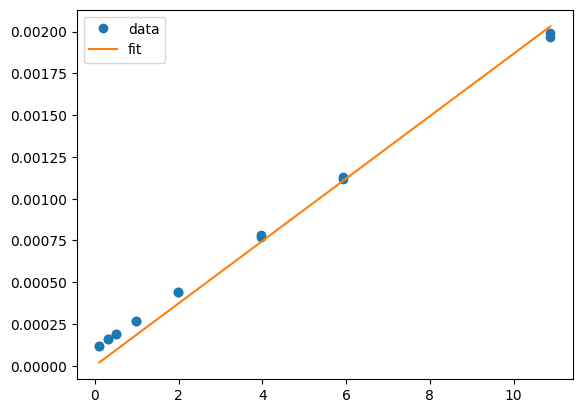

In [12]:
F = []
u = []
m = []

# Umaknili smo 30% najbolj odstopajhočih meritev zaradi hudega defekta

for i in va_profil_odmik:
    u.append(i.n)
for i in mer_obremenitev_z_napakami:
    m.append(i.n)

for i in range(len(u)):
    F.append( 9.81 * m[i] + 41 * u[i] )

sez = ["E_va"]
p = [1]

def funkcija(x,E):
    return x*0.56**3/(48*E*1.11*10**-10)

fp.cfit(funkcija, F, u,sez, p)


-| Fit values |----------------------------------------

fit_E_va : 125871500401.29398

-| Parameter standard deviation values |---------------

fit_E_va stdev (1 sigma) : 11461354404.006433

-| Graph |---------------------------------------------



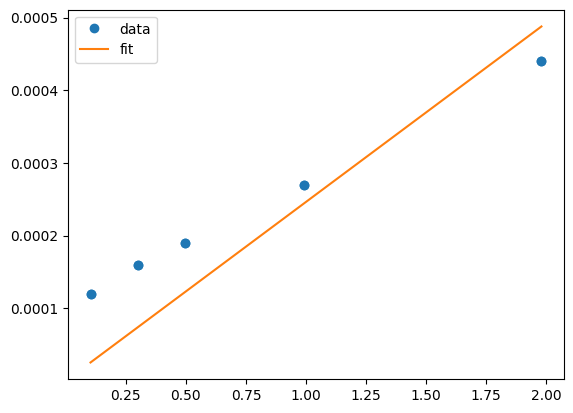

In [14]:
F = []
u = []
m = []

# Umaknili smo 30% najbolj odstopajhočih meritev zaradi hudega defekta

m = [0.01, 0.03, 0.05, 0.1, 0.2, 0.2, 0.1, 0.05, 0.03, 0.01]
F = [0.10301999999999997, 0.30085999999999996, 0.49829, 0.9920700000000001, 1.9800400000000002, 1.9800400000000002, 0.9920700000000001, 0.49829, 0.30085999999999996, 0.10301999999999997]
u = [0.00011999999999999922, 0.00015999999999999925, 0.0001899999999999995, 0.00026999999999999957, 0.00043999999999999953, 0.00043999999999999953, 0.00026999999999999957, 0.0001899999999999995, 0.00015999999999999925, 0.00011999999999999922]

sez = ["E_va"]
p = [1]

def funkcija(x,E):
    return x*0.56**3/(48*E*1.18*10**-10)

fp.cfit(funkcija, F, u,sez, p)

C:\Users\X\AppData\Local\Temp\ipykernel_21964\2371174336.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


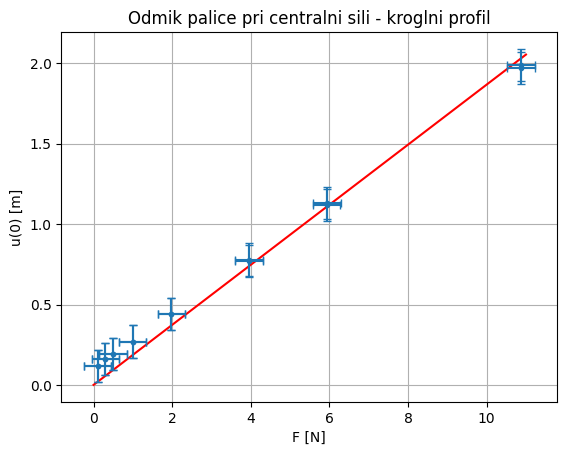

In [144]:
import matplotlib.pyplot as plt
import numpy as np

F = []
u = []
m = []


k = 0.0001688
E = 176440198504.8972

for i in va_profil_odmik:
    u.append(i.n)
for i in mer_obremenitev_z_napakami:
    m.append(i.n)

for i in range(len(u)):
    F.append( 9.81 * m[i] + 41 * u[i] )

u1 = u
u = []
for i in u1:
    u.append(i*10**3)

yerr = [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000]
xerr = [0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500]
x = np.linspace(0,11,100)
y = (x*0.56**3/(48*E*1.11*10**-10))*10**3

fig, ax = plt.subplots()

ax.plot(x,y,"r")
ax.errorbar(F, u, yerr=yerr, xerr = xerr, fmt=".", capsize=3, label='bar')
ax.grid(True, which="both")
plt.ylabel("u(0) [m]")
plt.xlabel("F [N]")
plt.title("Odmik palice pri centralni sili - kroglni profil")
fig.show()
fig.savefig("odmik_palice_kroglni_prf", dpi=300, bbox_inches='tight', transparent=True)

C:\Users\X\AppData\Local\Temp\ipykernel_21964\1902107368.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


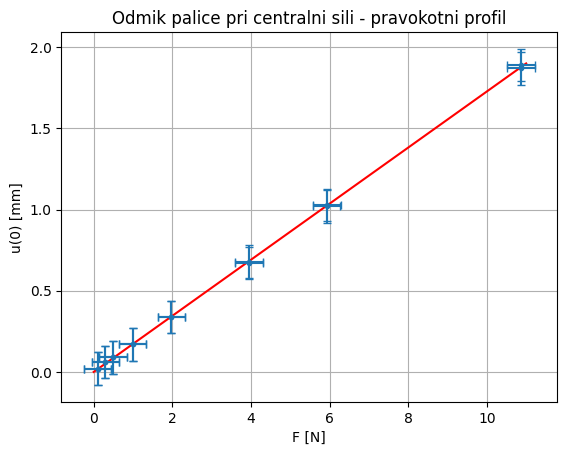

In [142]:
import matplotlib.pyplot as plt
import numpy as np

F = []
u = []
m = []


k = 0.0001688
E = 112040341032.55211

for i in kv_profil_odmik:
    u.append(i.n)
for i in mer_obremenitev_z_napakami:
    m.append(i.n)

for i in range(len(u)):
    F.append( 9.81 * m[i] + 41 * u[i] )

u1 = u
u = []
for i in u1:
    u.append(i*10**3)
    

yerr = [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000]
xerr = [0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500]

x = np.linspace(0,11,100)
y = (x*0.56**3/(48*E*1.89*10**-10))*10**3

fig, ax = plt.subplots()

ax.plot(x,y,"r")
ax.errorbar(F, u, yerr=yerr, xerr = xerr, fmt=".", capsize=3, label='bar')
ax.grid(True, which="both")
plt.ylabel("u(0) [mm]")
plt.xlabel("F [N]")
plt.title("Odmik palice pri centralni sili - pravokotni profil")
fig.show()
fig.savefig("odmik_palice_pravokotni_prf", dpi=300, bbox_inches='tight', transparent=True)

C:\Users\X\AppData\Local\Temp\ipykernel_21964\2378671974.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


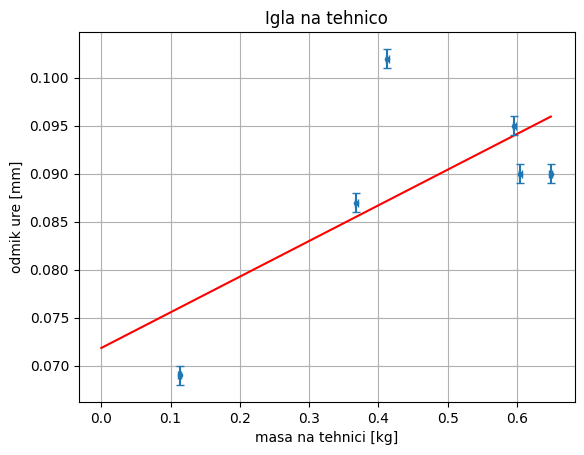

In [138]:
ura = [0.649, 0.605, 0.596, 0.413, 0.368, 0.113]
masa = [0.09, 0.09, 0.095, 0.102, 0.087, 0.069]
xerr = [0.002, 0.002, 0.002, 0.002, 0.002, 0.002]
yerr = [0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
ki = 37.14

x = np.linspace(0,0.649,10)
y = ki*10**-3 *  x + 0.07185

fig, ax = plt.subplots()
ax.plot(x,y,"r")
ax.errorbar(ura, masa, yerr=yerr, xerr = xerr, fmt=".", capsize=3, label='bar')
ax.grid(True, which="both")
plt.ylabel("odmik ure [mm]")
plt.xlabel("masa na tehnici [kg]")
plt.title("Igla na tehnico")
fig.show()
fig.savefig("igla_na_tehnico", dpi=300, bbox_inches='tight', transparent=True)

C:\Users\X\AppData\Local\Temp\ipykernel_21964\1453514908.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


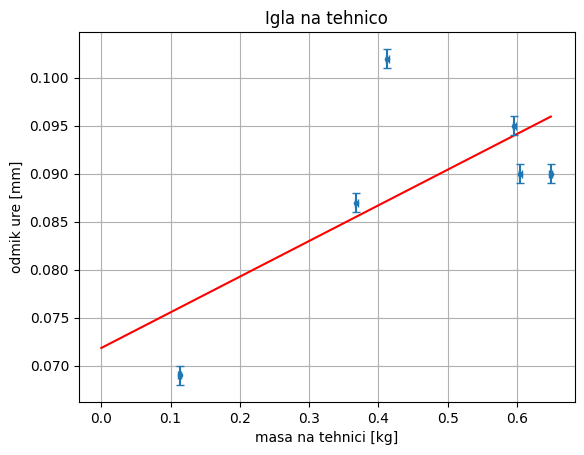

In [140]:
ura = [0.649, 0.605, 0.596, 0.413, 0.368, 0.113]
masa = [0.09, 0.09, 0.095, 0.102, 0.087, 0.069]
xerr = [0.002, 0.002, 0.002, 0.002, 0.002, 0.002]
yerr = [0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
ki = 37.14

x = np.linspace(0,0.649,10)
y = ki*10**-3 *  x + 0.07185

fig, ax = plt.subplots()
ax.plot(x,y,"r")

plot, caps, bars = ax.errorbar(ura, masa, yerr=yerr, xerr=xerr, fmt=".", capsize=3, label='bar')
#                   ax.errorbar(ura, masa, yerr=yerr, xerr = xerr, fmt=".")


ax.grid(True, which="both")
plt.ylabel("odmik ure [mm]")
plt.xlabel("masa na tehnici [kg]")
plt.title("Igla na tehnico")
fig.show()
fig.savefig("igla_na_tehnico", dpi=300, bbox_inches='tight', transparent=True)